#  session id 패턴 분석

### 이해원

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.rcParams['font.family'] ='D2Coding'

In [3]:
final = pd.read_csv('merge_product_head.csv')
pd.set_option('display.max_rows', None)

In [4]:
final['event_type'].value_counts()

event_type
department    206547
product       206547
cart          206547
purchase       75357
Name: count, dtype: int64

### 전제
패턴 = (department, product, cart) 1쌍

### A
- true 값이 하나라도 있는 session id 기준  =  이상치라고 추정되는 session id 기준
- [패턴이 2번 이상 반복되는 session_id의 고유 카운트 / 모든 session_id 고유 카운트] 비율

### B
- true 값이 없는 session id 기준
- [패턴이 2번 이상 반복되는 session_id의 고유 카운트 / 모든 session_id 고유 카운트] 비율

### 최종 목표
A와 B 비교

----

# 1. 분석 진행

## (1) A
- true 값이 하나라도 있는 (= 세션 만료가 있는) session_id 히스토리 데이터프레임에서
- 전체 세션 고유 카운트, 패턴이 2개 이상인 세션 고유 카운트, 비율 구하기
- 단, 각 패턴에 해당하는 session_id 에서 product_id가 같아야 함

In [5]:
# 패턴이 2개 이상이고, 모든 product_id가 같은 session id 빈 리스트 만들어놓기
over2_pattern_same_product_sessions = []

# 패턴이 2개 이상인 세션 아이디 찾기
for session_id, i in final.groupby('session_id'):
    event_types = ''.join(i['event_type'])
    
    # 패턴이 2개 이상인 경우
    if event_types.count('departmentproductcart') >= 2:
        # product_id의 고유값 수가 1인 경우 (=product id가 모두 같음)
        product_id_countd = i[i['event_type'] == 'product']['product_id'].unique()
        if len(product_id_countd) == 1:
            over2_pattern_same_product_sessions.append(session_id)

# 해당하는 세션 아이디들의 데이터프레임 행을 뽑기
df_over2pattern_sameproduct = final[final['session_id'].isin(over2_pattern_same_product_sessions)]

In [20]:
df_over2pattern_sameproduct.head(20)

,Unnamed: 0,session_id,created_at,event_type,product_id,browser,traffic_source,city,date_diff,date_diff_seconds,boolean_time_diff_30,id,category
0,0,0002d566-70ed-44d8-8213-33942ffc0899,2021-10-04 22:13:42+00:00,department,NaN,Chrome,Adwords,Sidrolândia,0 days 00:00:00,0.0,False,NaN,NaN
1,1,0002d566-70ed-44d8-8213-33942ffc0899,2021-10-04 22:16:22+00:00,product,6044.0,Chrome,Adwords,Sidrolândia,0 days 00:02:40,160.0,False,6044.0,Leggings
2,2,0002d566-70ed-44d8-8213-33942ffc0899,2021-10-04 22:17:11+00:00,cart,NaN,Chrome,Adwords,Sidrolândia,0 days 00:00:49,49.0,False,NaN,NaN
3,3,0002d566-70ed-44d8-8213-33942ffc0899,2021-10-04 22:17:14+00:00,department,NaN,Chrome,Adwords,Sidrolândia,0 days 00:00:03,3.0,False,NaN,NaN
4,4,0002d566-70ed-44d8-8213-33942ffc0899,2021-10-04 22:17:52+00:00,product,6044.0,Chrome,Adwords,Sidrolândia,0 days 00:00:38,38.0,False,6044.0,Leggings
5,5,0002d566-70ed-44d8-8213-33942ffc0899,2021-10-04 22:20:43+00:00,cart,NaN,Chrome,Adwords,Sidrolândia,0 days 00:02:51,171.0,False,NaN,NaN
6,6,0002d566-70ed-44d8-8213-33942ffc0899,2021-10-07 22:22:26+00:00,purchase,NaN,Chrome,Adwords,Sidrolândia,3 days 00:01:43,259303.0,True,NaN,NaN
7,7,0003af9b-acfc-4cef-bd10-c106172b56e6,2021-05-15 15:30:11+00:00,department,NaN,Chrome,YouTube,Münster,0 days 00:00:00,0.0,False,NaN,NaN
8,8,0003af9b-acfc-4cef-bd10-c106172b56e6,2021-05-15 15:32:15+00:00,product,24245.0,Chrome,YouTube,Münster,0 days 00:02:04,124.0,False,24245.0,Outerwear & Coats
9,9,0003af9b-acfc-4cef-bd10-c106172b56e6,2021-05-15 15:35:12+00:00,cart,NaN,Chrome,YouTube,Münster,0 days 00:02:57,177.0,False,NaN,NaN


In [7]:
total_sessionid = final['session_id'].nunique()
over2pattern_sameproduct_sessionid = df_over2pattern_sameproduct['session_id'].nunique()
ratio = over2pattern_sameproduct_sessionid / total_sessionid

print('True가 한 개 이상 있는 (세션 만료가 있는) session_id 그룹')
print('전체 세션 아이디 카운트(고유):', total_sessionid)
print('패턴 2회 이상 반복 및 product_id가 같은 세션 아이디 카운트(고유)', over2pattern_sameproduct_sessionid)
print('비율', ratio)

True가 한 개 이상 있는 (세션 만료가 있는) session_id 그룹
전체 세션 아이디 카운트(고유): 75357
패턴 2회 이상 반복 및 product_id가 같은 세션 아이디 카운트(고유) 74677
비율 0.9909762862109691


## (2) B
- true 값이 없는 (= 세션 만료가 없는) session_id 히스토리 데이터프레임에서
- 전체 세션 고유 카운트, 패턴이 2개 이상인 세션 고유 카운트, 비율 구하기
- 단, 각 패턴에 해당하는 session_id 에서 product_id가 같아야 함

In [8]:
falsese = pd.read_csv('false_df.csv')

In [9]:
# 패턴이 2개 이상이고, 모든 product_id가 같은 session id 빈 리스트 만들어놓기
fal_over2_pattern_same_product_sessions = []

# 패턴이 2개 이상인 세션 아이디 찾기
for session_id, i in falsese.groupby('session_id'):
    fal_event_types = ''.join(i['event_type'])
    
    # 패턴이 2개 이상인 경우
    if fal_event_types.count('departmentproductcart') >= 2:
        # product_id의 고유값 수가 1인 경우 (=product id가 모두 같음)
        fal_product_id_countd = i[i['event_type'] == 'product']['product_id'].unique()
        if len(fal_product_id_countd) == 1:
            fal_over2_pattern_same_product_sessions.append(session_id)

# 해당하는 세션 아이디들의 데이터프레임 행을 뽑기
fal_df_over2pattern_sameproduct = falsese[falsese['session_id'].isin(fal_over2_pattern_same_product_sessions)]

In [10]:
fal_df_over2pattern_sameproduct.head(20)

,Unnamed: 0,session_id,created_at,event_type,product_id,browser,traffic_source,date_diff,date_diff_seconds,boolean_time_diff_30,id,category
63,63,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:41:27+00:00,department,NaN,IE,Adwords,0 days 00:00:00,0.0,False,NaN,NaN
64,64,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:43:35+00:00,product,9737.0,IE,Adwords,0 days 00:02:08,128.0,False,9737.0,Sleep & Lounge
65,65,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:45:20+00:00,cart,NaN,IE,Adwords,0 days 00:01:45,105.0,False,NaN,NaN
66,66,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:48:06+00:00,department,NaN,IE,Adwords,0 days 00:02:46,166.0,False,NaN,NaN
67,67,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:50:48+00:00,product,9737.0,IE,Adwords,0 days 00:02:42,162.0,False,9737.0,Sleep & Lounge
68,68,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:51:29+00:00,cart,NaN,IE,Adwords,0 days 00:00:41,41.0,False,NaN,NaN
69,69,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:52:22+00:00,department,NaN,IE,Adwords,0 days 00:00:53,53.0,False,NaN,NaN
70,70,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:55:20+00:00,product,9737.0,IE,Adwords,0 days 00:02:58,178.0,False,9737.0,Sleep & Lounge
71,71,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:55:49+00:00,cart,NaN,IE,Adwords,0 days 00:00:29,29.0,False,NaN,NaN
72,72,0002a65e-3a50-405a-8f54-d9389c8a0b82,2023-12-31 11:57:24+00:00,department,NaN,IE,Adwords,0 days 00:01:35,95.0,False,NaN,NaN


In [11]:
fal_total_sessionid = falsese['session_id'].nunique()
fal_over2pattern_sameproduct_sessionid = fal_df_over2pattern_sameproduct['session_id'].nunique()
fal_ratio = fal_over2pattern_sameproduct_sessionid / fal_total_sessionid

print('True가 하나도 없는 (세션 만료가 없는) session_id 그룹')
print('전체 세션 아이디 카운트(고유):', fal_total_sessionid)
print('패턴 2회 이상 반복 및 product_id가 같은 세션 아이디 카운트(고유)', fal_over2pattern_sameproduct_sessionid)
print('비율', fal_ratio)

True가 하나도 없는 (세션 만료가 없는) session_id 그룹
전체 세션 아이디 카운트(고유): 606402
패턴 2회 이상 반복 및 product_id가 같은 세션 아이디 카운트(고유) 18511
비율 0.03052595472970076


# 2. 시각화

📌 용어 정리
- 문제 속성 : 패턴이 2회 이상 반복되며, 해당 패턴에서 product id의 고유 카운트가 1인(=같은 제품을 두 번 이상 장바구니에 넣은) 경우



📌 데이터 프레임 정리
- df_over2pattern_sameproduct : True가 한 개 이상 있는 (세션 만료가 있는, 이상치로 추정되는) session id 그룹에서 "문제 속성"이 있는 session id를 모은 데이터프레임
- fal_df_over2pattern_sameproduct : True가 없는 (센션 만료가 없는) session id 그룹에서 "문제 속성"이 있는 session id를 모은 데이터프레임

## (1) 컬럼 별 Pie chart

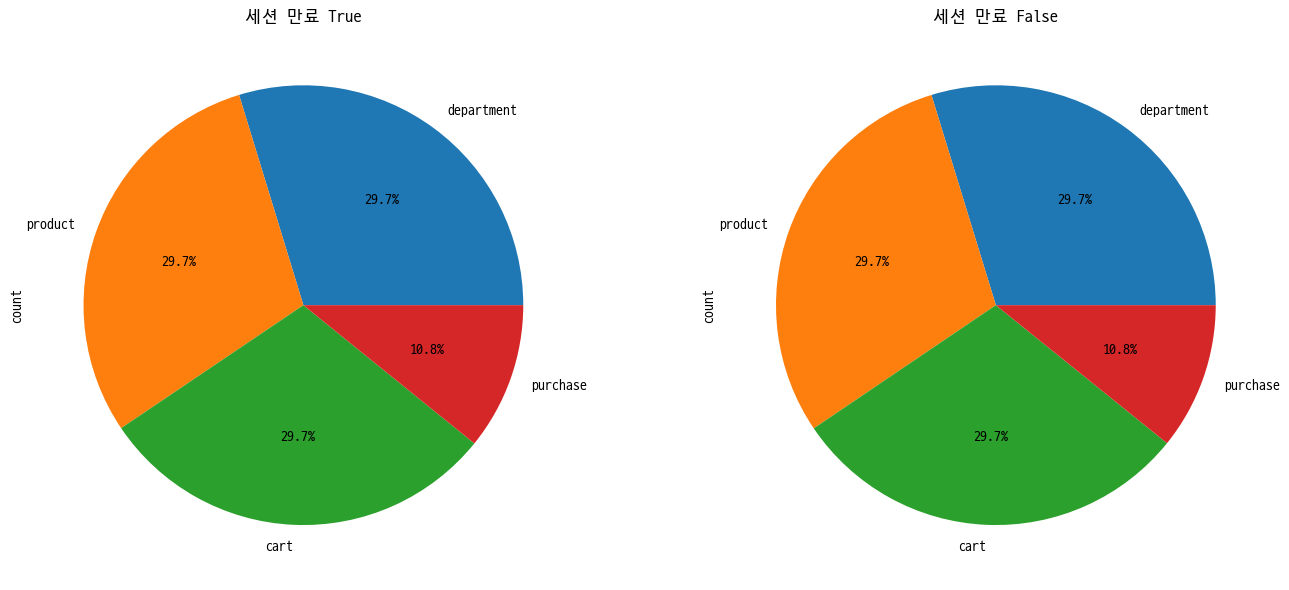

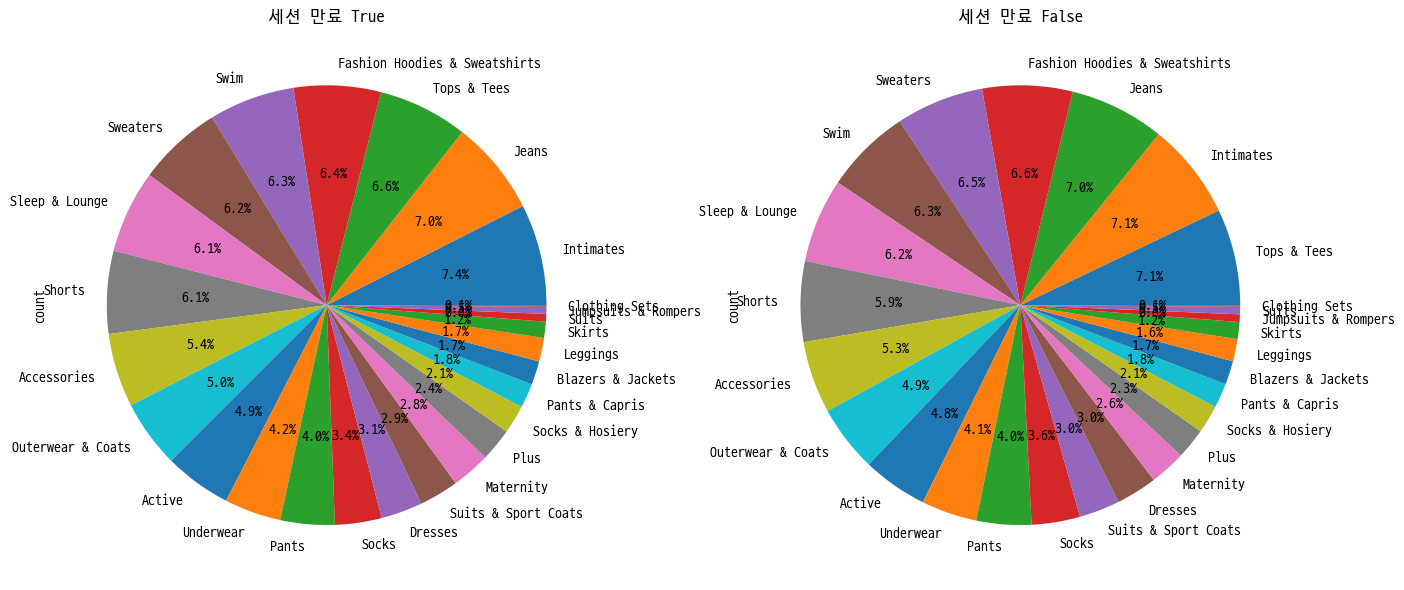

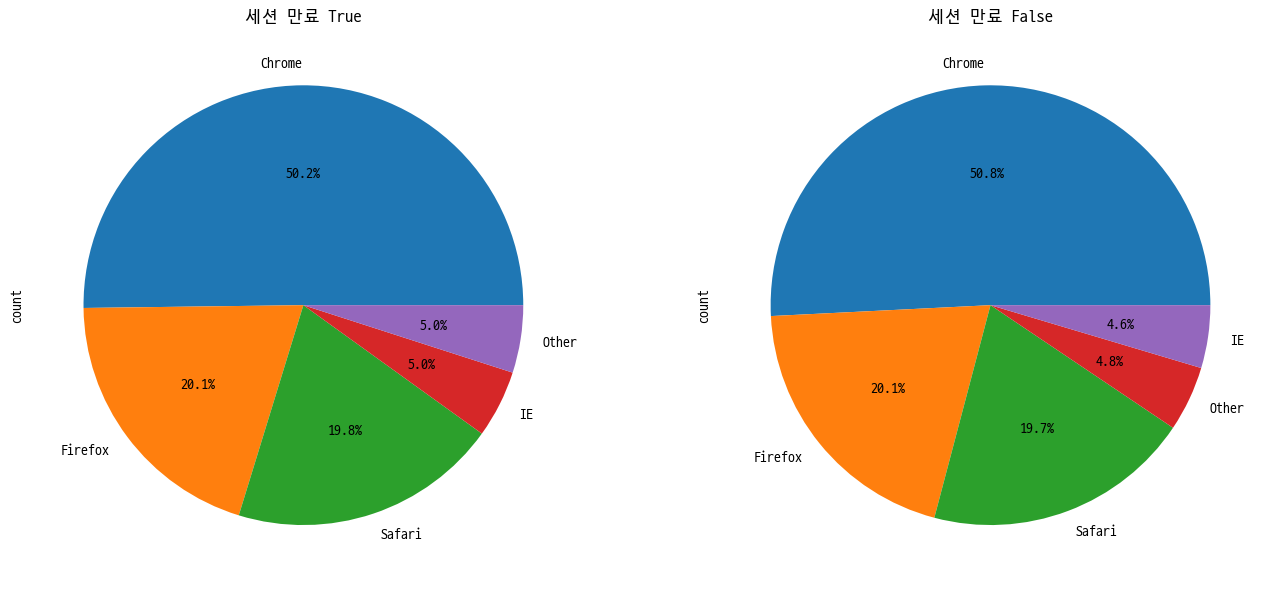

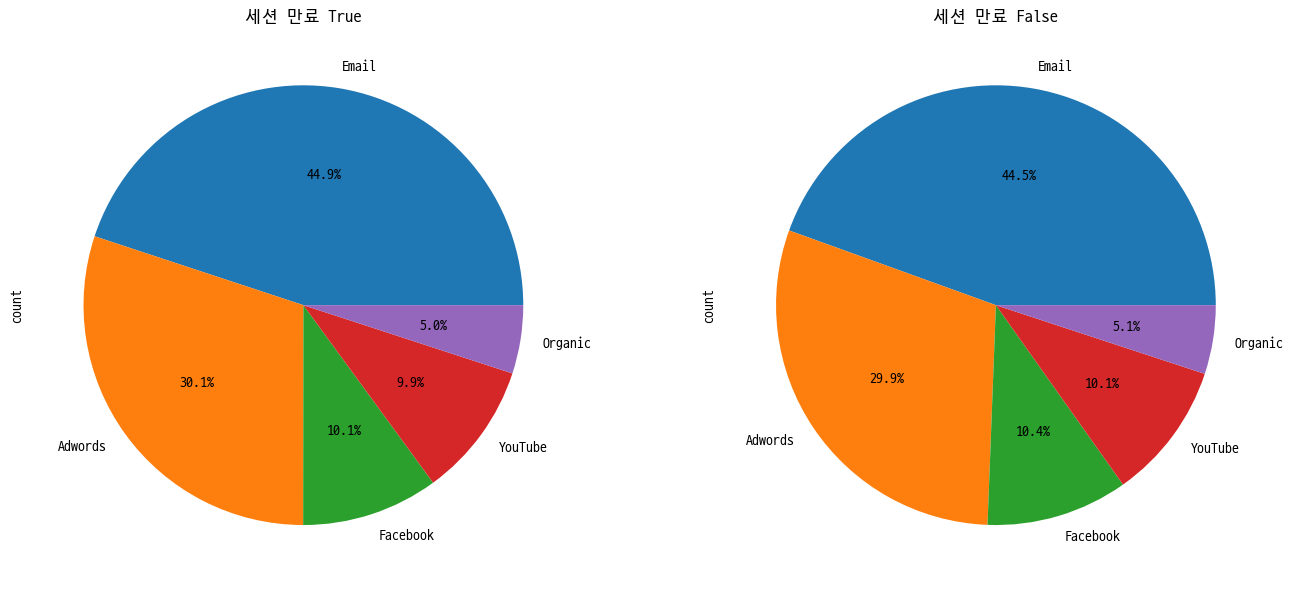

In [19]:
vis_list = ['event_type', 'category', 'browser', 'traffic_source']

for i in vis_list:    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
    df_over2pattern_sameproduct[i].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%') 
    ax[0].set_title('세션 만료 True')
    fal_df_over2pattern_sameproduct[i].value_counts().plot.pie(ax=ax[1], autopct='%1.1f%%')
    ax[1].set_title('세션 만료 False')
    plt.tight_layout()
    plt.show()